In [1]:
# =============================================================
# Copyright © 2020 Intel Corporation
# 
# SPDX-License-Identifier: MIT
# =============================================================

# Intel Python sklearn Getting Started Example for Shared Memory Systems


Intel(R) Extension for Scikit-learn is a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel(R) oneAPI Data Analytics Library (oneDAL). 

In this example we will be recognizing **handwritten digits** using a machine learning classification algorithm. Handwritten digits Dataset is from sklearn toy datasets. Digits dataset contains 1797 input images and for each image there are 64 pixels(8x8 matrix) as features. Output has 10 classes corresponding to all the digits(0-9). Support Vector Machine(SVM) classifier is being used as machine learning classification algorithm.


## Importing and Organizing Data

Let's start by **importing** all necessary data and packages. Intel(R) Extension for Scikit-learn* dynamically patches scikit-learn estimators to use Intel(R) oneAPI Data Analytics Library as the underlying solver, while getting the same solution faster. To undo the patch, run *sklearnex.unpatch_sklearn()*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import random

#Intel(R) Extension for Scikit-learn dynamically patches scikit-learn estimators to use oneDAL as the underlying solver
from sklearnex import patch_sklearn
patch_sklearn()

# Import datasets, svm classifier and performance metrics
from sklearn import datasets, svm, metrics, preprocessing
from sklearn.model_selection import train_test_split

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Now let's **load** in the dataset and check some examples of input images

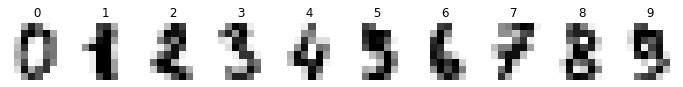

In [2]:
# Load the handwritten digits dataset from sklearn datasets 
digits = datasets.load_digits()

#Check the examples of input images corresponding to each digit
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 12))
for i,ax in enumerate(axes):
    ax.set_axis_off()
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.set_title(' %i' % digits.target[i])


Split the dataset into train and test and **organize** it as necessary to work with our model.

In [3]:
# digits.data stores flattened ndarray size 64 from 8x8 images.
X,Y = digits.data, digits.target

# Split dataset into 80% train images and 20% test images
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# normalize the input values by scaling each feature by its maximum absolute value
X_train = preprocessing.maxabs_scale(X_train)
X_test = preprocessing.maxabs_scale(X_test)

## Training and Saving the Model

Let's **train our model** and **save the training model to a file**:

In [4]:
# Create a classifier: a support vector classifier
model = svm.SVC(gamma=0.001, C=100)

# Learn the digits on the train subset
model.fit(X_train, Y_train)

# Save the model to a file
filename = 'finalized_svm_model.sav'
joblib.dump(model, filename)

## Making a Prediction and Saving the Results

Time to **make a prediction!**

In [5]:
# Now predicting the digit for test images using the trained model
loaded_model = joblib.load(filename)
Y_pred = loaded_model.predict(X_test)

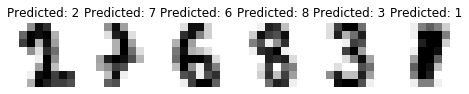

In [6]:
# Predict the value of the digit on the random subset of test images
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(8, 3))
random_examples = random.sample(list(range(len(X_test))),6)

for i,ax in zip(random_examples, axes):
    ax.set_axis_off()
    ax.imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray_r)
    ax.set_title(f'Predicted: {Y_pred[i]}')

To **get the accuracy of trained model on test data**

In [2]:
result = loaded_model.score(X_test, Y_test)
print(f"Model accuracy on test data: {result}")

Model accuracy on test data: 1


Now let's **export the results to a CSV file**.

In [8]:
np.savetxt("svm_results.csv", Y_pred, delimiter =  ",")
print("[CODE_SAMPLE_COMPLETED_SUCCESFULLY]")

[CODE_SAMPLE_COMPLETED_SUCCESFULLY]
